In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('vehicles.csv')

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
id              435849 non-null int64
url             435849 non-null object
region          435849 non-null object
region_url      435849 non-null object
price           435849 non-null int64
year            434732 non-null float64
manufacturer    415102 non-null object
model           429650 non-null object
condition       249043 non-null object
cylinders       269465 non-null object
fuel            432858 non-null object
odometer        360701 non-null float64
title_status    434043 non-null object
transmission    433703 non-null object
vin             239197 non-null object
drive           313838 non-null object
size            139888 non-null object
type            318741 non-null object
paint_color     300602 non-null object
image_url       435825 non-null object
description     435822 non-null object
county          0 non-null float64
state           435849 non-null obj

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [8]:
#Cleaning unnecassory data
df.drop(columns=['url','region_url','image_url','county'])

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,description,state,lat,long
0,7119256118,mohave county,3495,2012.0,jeep,patriot,like new,4 cylinders,gas,NaN,...,automatic,NaN,NaN,NaN,NaN,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,7120880186,oregon coast,13750,2014.0,bmw,328i m-sport,good,NaN,gas,76237.0,...,automatic,NaN,rwd,NaN,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,7115048251,greenville / upstate,2300,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,...,automatic,NaN,NaN,NaN,NaN,NaN,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,7119250502,mohave county,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,...,automatic,1GCCS196448191644,rwd,mid-size,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
4,7120433904,maine,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,other,NaN,...,other,NaN,NaN,NaN,NaN,NaN,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,me,44.4699,-68.8963
5,7120432569,maine,500,2010.0,NaN,$500 DOWN PROGRAMS!!!,NaN,NaN,gas,NaN,...,automatic,NaN,NaN,NaN,NaN,NaN,☛WE have 100's OF VEHICLES to choose from! CAL...,me,42.8424,-71.1077
6,7120431378,maine,0,2014.0,ford,f-150,excellent,8 cylinders,gas,0.0,...,automatic,S7002,4wd,full-size,pickup,NaN,2014 *** Ford F-150_ F150_ f150_ F 150_ 4X4 CR...,me,42.7663,-71.2352
7,7120430837,maine,8500,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,...,automatic,1ZVHT84N355252184,rwd,mid-size,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858
8,7120857037,oregon coast,0,2012.0,ram,3500,NaN,6 cylinders,diesel,116515.0,...,automatic,3C63D3KL1CG155836,4wd,NaN,truck,NaN,"Sunrise Auto SalesTry our Delivery Service , N...",or,45.4072,-122.6250
9,7120844862,oregon coast,5950,2004.0,honda,"odyssey ex-l, reliable, e",NaN,6 cylinders,gas,102415.0,...,automatic,5FNRL18924B012679,fwd,NaN,van,NaN,D&M Motors LLC STOCK #: R012679 ...,or,45.5772,-122.6760


In [9]:
df.shape

(435849, 25)

In [10]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


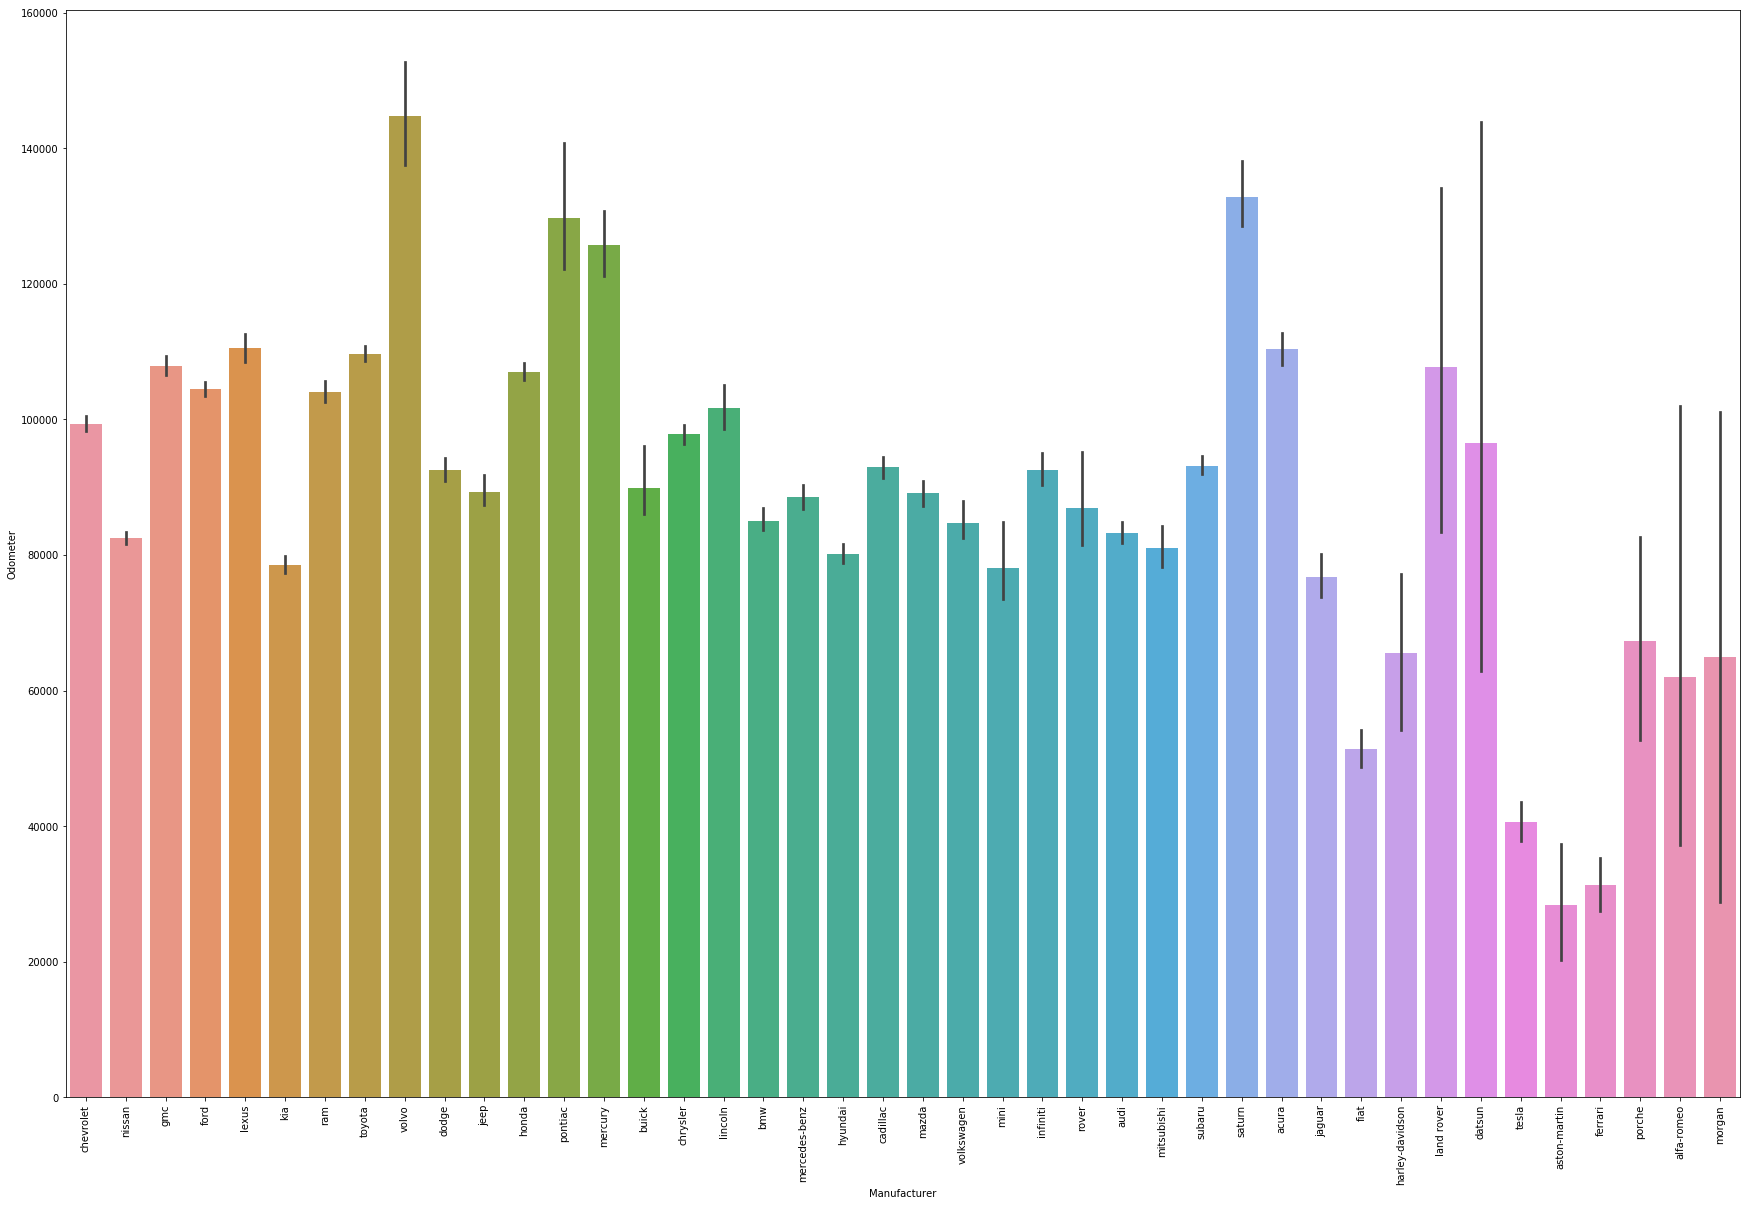

In [11]:
df=df.sort_values(by=['odometer'],ascending=True)
plt.figure(figsize=(30,20))
sns.barplot(x=df.manufacturer, y=df.odometer)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()

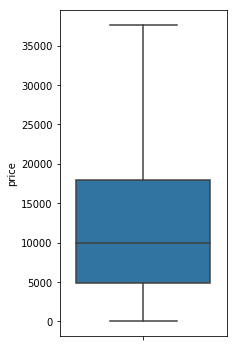

In [12]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df,showfliers=False);

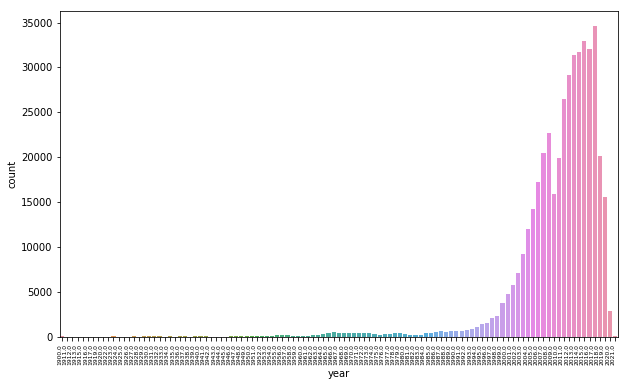

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

In [14]:
print ("The unique manufacturers we have are:")
print (df['manufacturer'].unique())

The unique manufacturers we have are:
['chevrolet' 'nissan' nan 'gmc' 'ford' 'lexus' 'kia' 'ram' 'toyota'
 'volvo' 'dodge' 'jeep' 'honda' 'pontiac' 'mercury' 'buick' 'chrysler'
 'lincoln' 'bmw' 'mercedes-benz' 'hyundai' 'cadillac' 'mazda' 'volkswagen'
 'mini' 'infiniti' 'rover' 'audi' 'mitsubishi' 'subaru' 'saturn' 'acura'
 'jaguar' 'fiat' 'harley-davidson' 'land rover' 'datsun' 'tesla'
 'aston-martin' 'ferrari' 'porche' 'alfa-romeo' 'morgan']


Text(0.5, 1.0, 'Manufacturers vs no. of listings')

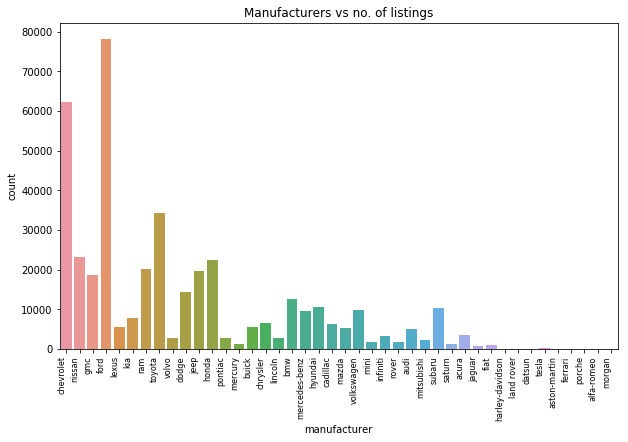

In [15]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='manufacturer',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Manufacturers vs no. of listings")

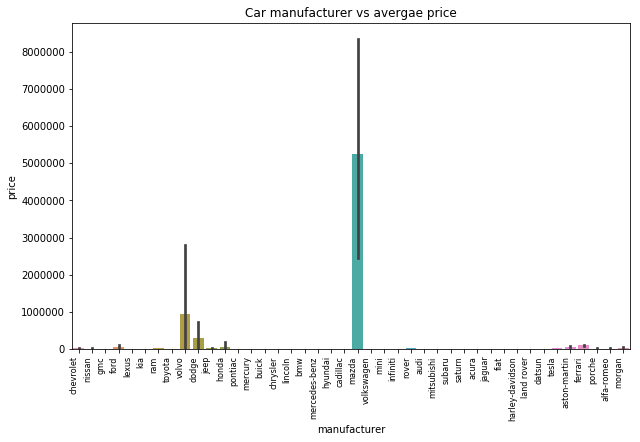

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car manufacturer vs avergae price");

In [17]:
print(df.price.describe())

count    4.358490e+05
mean     1.349127e+05
std      1.690857e+07
min      0.000000e+00
25%      4.900000e+03
50%      9.995000e+03
75%      1.798900e+04
max      3.647257e+09
Name: price, dtype: float64
